# Chapter 5 NLP workshop

# ดาวโหลด Library เพื่อใช้ในการประมวลผลข้อมูล

In [4]:
!pip install pythainlp
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 79.7 MB/s eta 0:00:00


# Data Preparation

In [2]:
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt
!wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt

--2025-10-29 17:07:32--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5658270 (5.4M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   5.40M  --.-KB/s    in 0.04s   

2025-10-29 17:07:32 (134 MB/s) - ‘train.txt’ saved [5658270/5658270]

--2025-10-29 17:07:32--  https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

In [5]:
import re
import string
import pandas as pd
from pythainlp.corpus.common import thai_stopwords
from pythainlp.tokenize import word_tokenize
from pythainlp.util import normalize


In [6]:
with open('train.txt', 'r', encoding='utf-8') as f:
    df_train = pd.DataFrame(f.read().splitlines(), columns=['text'])

with open('train_label.txt', 'r', encoding='utf-8') as f:
    df_train_label = pd.DataFrame(f.read().splitlines(), columns=['label'])

with open('test.txt', 'r', encoding='utf-8') as f:
    df_test = pd.DataFrame(f.read().splitlines(), columns=['text'])

with open('test_label.txt', 'r', encoding='utf-8') as f:
    df_test_label = pd.DataFrame(f.read().splitlines(), columns=['label'])


In [7]:
df_train['label'] = df_train_label
df_train.columns = ['text','label']
df_train.dropna(inplace=True)

df_test['label'] = df_test_label
df_test.columns = ['text','label']
df_test.dropna(inplace=True)

# ลดขนาด Data
df_train = df_train.iloc[:10000]

del df_train_label
del df_test_label

In [8]:
def clean_text(txt):


    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)

    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ space
    txt = re.sub(r' ','',txt)

    #ลบ เลข
    txt = re.sub("(\d)", "",txt)

    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)

    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())

    return txt



df_train.text = df_train.text.apply(clean_text)
df_test.text = df_test.text.apply(clean_text)

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4207336818.py:14: SyntaxWarning: invalid escape sequence '\d'
  txt = re.sub("(\d)", "",txt)


In [9]:
def remove_stw(txt):
  rm_stw_text =[]
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_text.append(i)
  return rm_stw_text

df_train['tokenized'] = df_train.text.apply(word_tokenize)
df_test['tokenized'] = df_test.text.apply(word_tokenize)
df_train['tokenized'] = df_train['tokenized'].apply(remove_stw)
df_test['tokenized'] = df_test['tokenized'].apply(remove_stw)

In [10]:
print('untokenized', df_train.text[0])
print('tokenized', df_train.tokenized[0])

untokenized ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
tokenized ['ประเทศ', 'ผลิต', 'ส่งออก', 'ยาสูบ', 'โลก', 'จิง', 'ป่าว', 'คับ']


# Exploratory Data Analysis & Text Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud

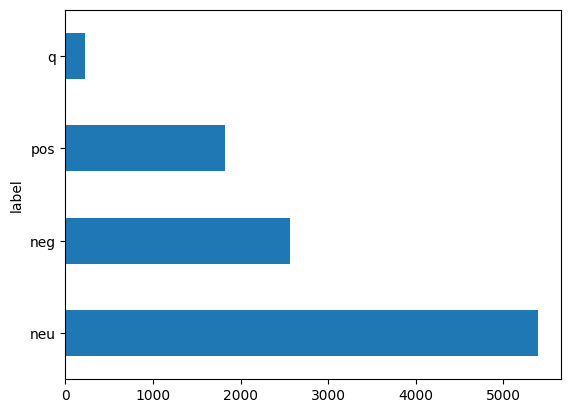

In [14]:
df_train.label.value_counts().plot.barh()
plt.show()

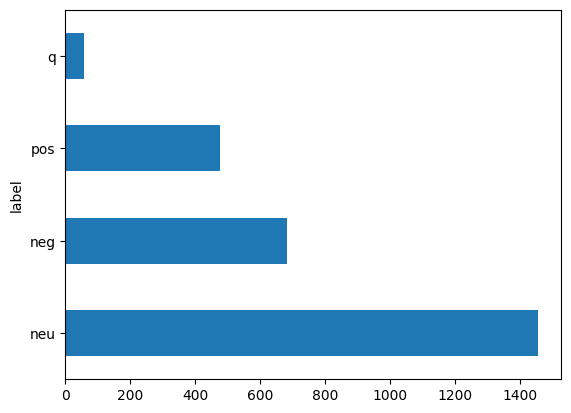

In [15]:
df_test.label.value_counts().plot.barh()
plt.show()

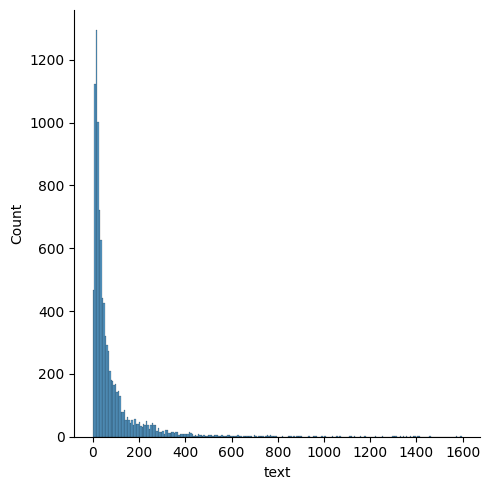

In [16]:
sns.displot(df_train.text.apply(len))

In [17]:
df_all_values = df_train[:10000].label.value_counts().to_frame()
df_all_values.columns = ['label_train']
df_all_values['label_test'] = df_test.label.value_counts()
df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])
df_all_values

/tmp/ipython-input-2457538603.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_all_values['percentage_train'] = df_all_values.label_train.apply(lambda x : x /df_all_values.sum()[0])
/tmp/ipython-input-2457538603.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_all_values['percentage_test'] = df_all_values.label_test.apply(lambda x : x /df_all_values.sum()[1])


,label_train,label_test,percentage_train,percentage_test
label,,,,
neu,5393,1456,0.5393,0.544503
neg,2562,683,0.2562,0.255423
pos,1818,478,0.1818,0.178758
q,227,57,0.0227,0.021316


/tmp/ipython-input-2505326274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['label'] == 'neg'].text.apply(len), hist=True, label='negative_train')
/tmp/ipython-input-2505326274.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['label'] == 'pos'

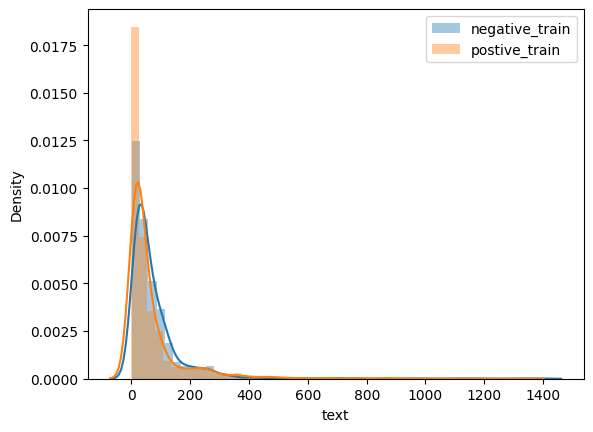

In [18]:
sns.distplot(df_train.loc[df_train['label'] == 'neg'].text.apply(len), hist=True, label='negative_train')
sns.distplot(df_train.loc[df_train['label'] == 'pos'].text.apply(len), hist=True, label='postive_train')
plt.legend()
plt.show()

/tmp/ipython-input-1551261709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['label'] == 'neu'].text.apply(len), hist=True, label='neutral_train')
/tmp/ipython-input-1551261709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['label'] == 'q'].t

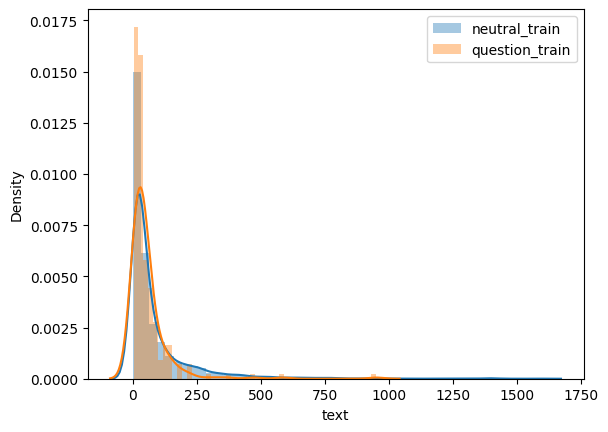

In [19]:
sns.distplot(df_train.loc[df_train['label'] == 'neu'].text.apply(len), hist=True, label='neutral_train')
sns.distplot(df_train.loc[df_train['label'] == 'q'].text.apply(len), hist=True, label='question_train')
plt.legend()
plt.show()

In [20]:
!apt-get install fonts-thai-tlwg
!fc-cache -fv
!ls /usr/share/fonts/truetype/tlwg/




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.7.3-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/tlwg: caching, new cache contents: 58 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetyp

In [21]:
# สร้างโฟลเดอร์เก็บฟอนต์
!mkdir -p /usr/share/fonts/truetype/thai/

# ดาวน์โหลดไฟล์ zip โดยใช้ URL ตรงไปยังไฟล์และกำหนด user-agent ให้เหมือน browser
!wget -O THSarabunNew.zip "https://www.f0nt.com/wp-content/files/sipafonts/THSarabunNew.zip" \
     --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64)"

# แตกไฟล์ไปยังโฟลเดอร์ฟอนต์
!unzip -o THSarabunNew.zip -d /usr/share/fonts/truetype/thai/

# รีเฟรช cache ฟอนต์
!fc-cache -fv

# ตรวจสอบไฟล์ .ttf
!ls /usr/share/fonts/truetype/thai/


--2025-10-29 17:10:39--  https://www.f0nt.com/wp-content/files/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   582KB/s    in 0.7s    

2025-10-29 17:10:41 (582 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew Italic.ttf  
   creating: /usr/share/fonts/truetype/thai/__MACOSX/
  inflating: /usr/share/fonts/truetype/thai/__MACOSX/._THSarabunNew Italic.ttf  
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew.ttf  
  inflating: /usr/share/fonts/truetype/thai/__MACOSX/._THSarabunNew.ttf  
  inflating: /usr/share/fonts/truetype/thai/THSarabunNew BoldItalic.ttf  
  inflating: /usr/share/fonts/truetype

In [22]:
regexp = r"[ก-๙a-zA-Z']+"
path = 'THSarabunNew.ttf'

# Join all the tokenized words into a single string
tokenized_list = [word for tokens in df_train['tokenized'] for word in tokens]
tokenized_string = " ".join(tokenized_list)

wordcloud = WordCloud(
                      font_path=path,
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000,
                      colormap='plasma',
                      scale=3,
                      font_step=4,
                      contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(tokenized_string)

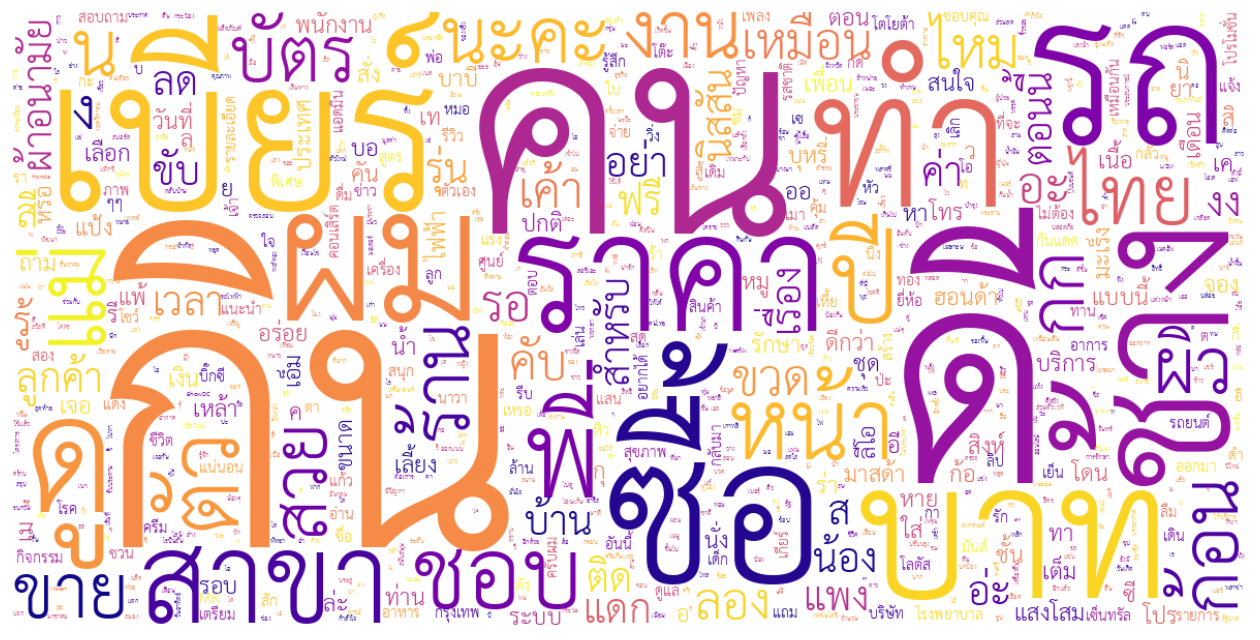

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [24]:
import collections
neg = df_train.loc[df_train.label=="neg"].tokenized
pos= df_train.loc[df_train.label=="pos"].tokenized
all= df_train.tokenized

count_neg=[]
count_pos=[]
count_all=[]
for i in neg:
    for j in i:
            count_neg.append(j)
for i in pos:
    for j in i:
            count_pos.append(j)
for i in all:
    for j in i:
            count_all.append(j)

counter_pos=collections.Counter(count_neg)
counter_neg=collections.Counter(count_pos)
counter_all=collections.Counter(count_all)


your_list_neg = [list(i) for i in counter_neg.items()]
your_list_pos = [list(i) for i in counter_pos.items()]
your_list= [list(i) for i in counter_all.items()]

count = pd.DataFrame(your_list,columns=['Word','Counts'])
count_neg = pd.DataFrame(your_list_neg,columns=['Word','Counts_positive'])
count_pos = pd.DataFrame(your_list_pos,columns=['Word','Counts_negative'])


result = pd.merge(pd.merge(count,count_neg,on='Word'),count_pos,on='Word')

In [25]:
result

,Word,Counts,Counts_positive,Counts_negative
0,ประเทศ,119,8,35
1,ผลิต,45,2,12
2,ส่งออก,6,1,2
3,โลก,66,8,13
4,จิง,25,4,3
...,...,...,...,...
2914,Pajero,2,1,1
2915,ดั้งเดิม,2,1,1
2916,ระยะทาง,3,1,1
2917,จัดอันดับ,2,1,1


In [26]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

[font.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of font.zip or
        font.zip.zip, and cannot find font.zip.ZIP, period.


In [27]:
# ติดตั้งฟอนต์ Sarabun
!apt-get -y install fonts-thai-tlwg

# ตั้งค่าฟอนต์ไทย
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'TH Sarabun New'
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.7.3-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


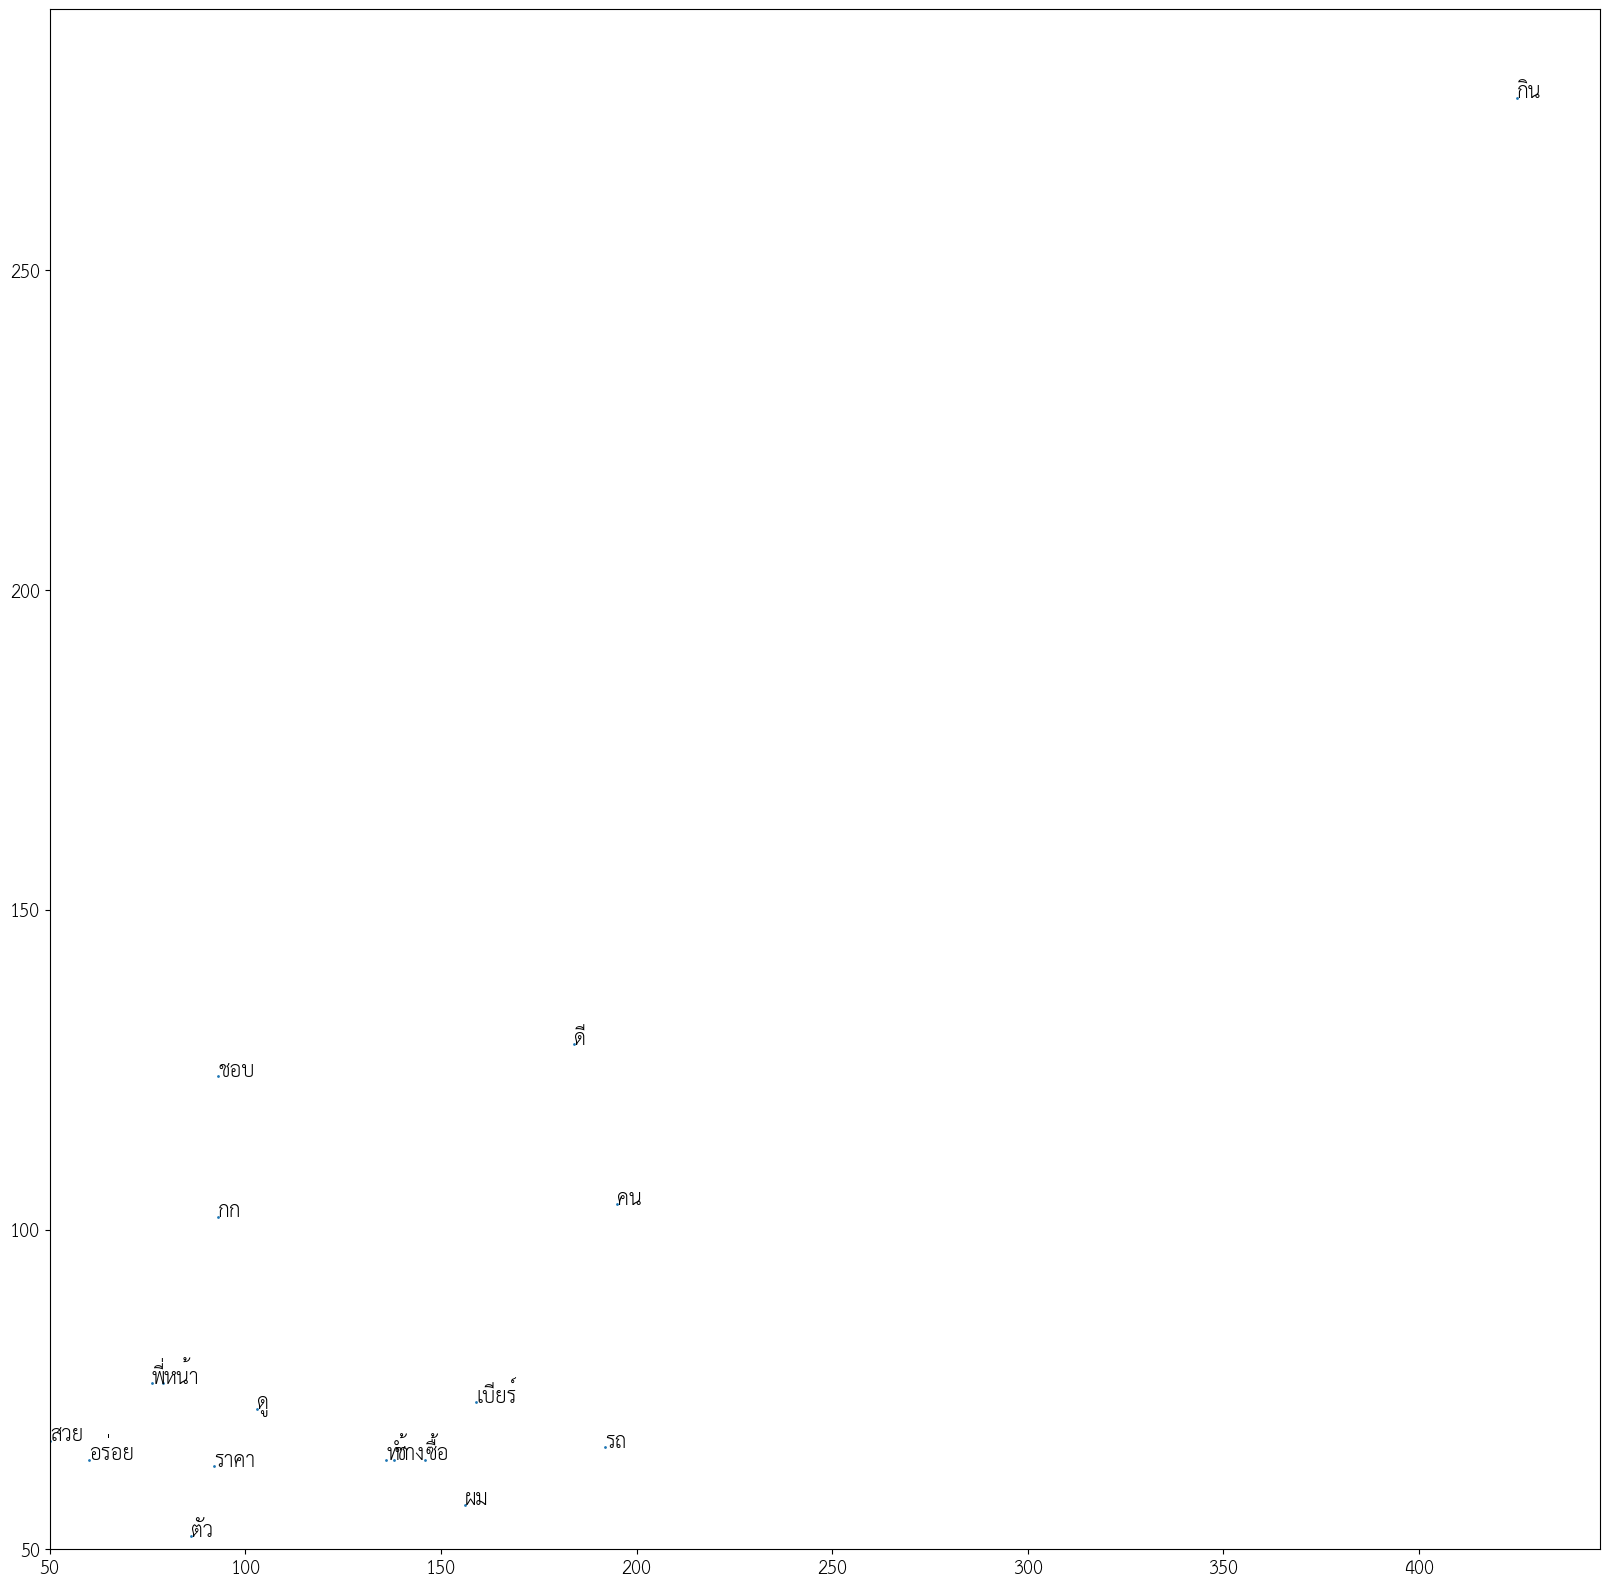

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ระบุ path ฟอนต์ (ตรงกับที่ติดตั้ง)
font_path = '/usr/share/fonts/truetype/thai/THSarabunNew.ttf'

# เพิ่มฟอนต์เข้า Matplotlib
fm.fontManager.addfont(font_path)
mpl.rc('font', family='TH Sarabun New')
plt.rcParams['axes.unicode_minus'] = False  # ป้องกันเครื่องหมายลบกลายเป็นสี่เหลี่ยม

x = result.Counts_negative.tolist()
y = result.Counts_positive.tolist()

plt.figure(figsize=(20, 20))
plt.scatter(x, y, s=1)
plt.xlim(50,)
plt.ylim(50,)

for i, txt in enumerate(result.Word.tolist()):
    plt.annotate(txt, (x[i], y[i]))

plt.savefig('foo.pdf')
plt.show()


# Feature extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], random_state = 0)

tfidf = TfidfVectorizer(tokenizer = word_tokenize)
tfidf_train_vec = tfidf.fit_transform(X_train).toarray()
tfidf_df = pd.DataFrame(tfidf_train_vec)

tfidf_test_vec = tfidf.transform(X_test).toarray()

print('train data', tfidf_train_vec.shape)
print('test data',tfidf_test_vec.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train data (7500, 14220)
test data (2500, 14220)


In [ ]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,14210,14211,14212,14213,14214,14215,14216,14217,14218,14219
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine learning : Text Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-66052297.py:17: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


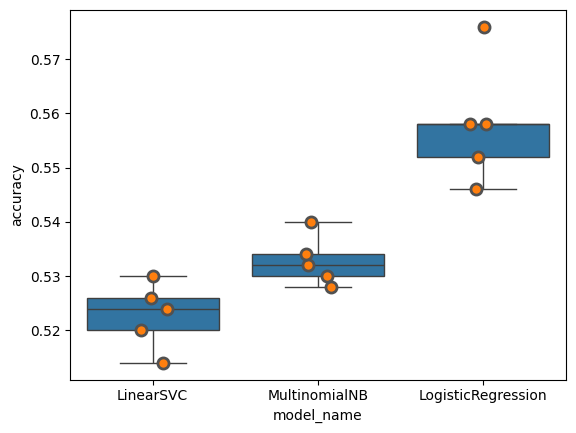

In [ ]:
models = [
    LinearSVC(random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, tfidf_test_vec, y_test, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [ ]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)

,accuracy
model_name,
LogisticRegression,0.5580
MultinomialNB,0.5328
LinearSVC,0.5228


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


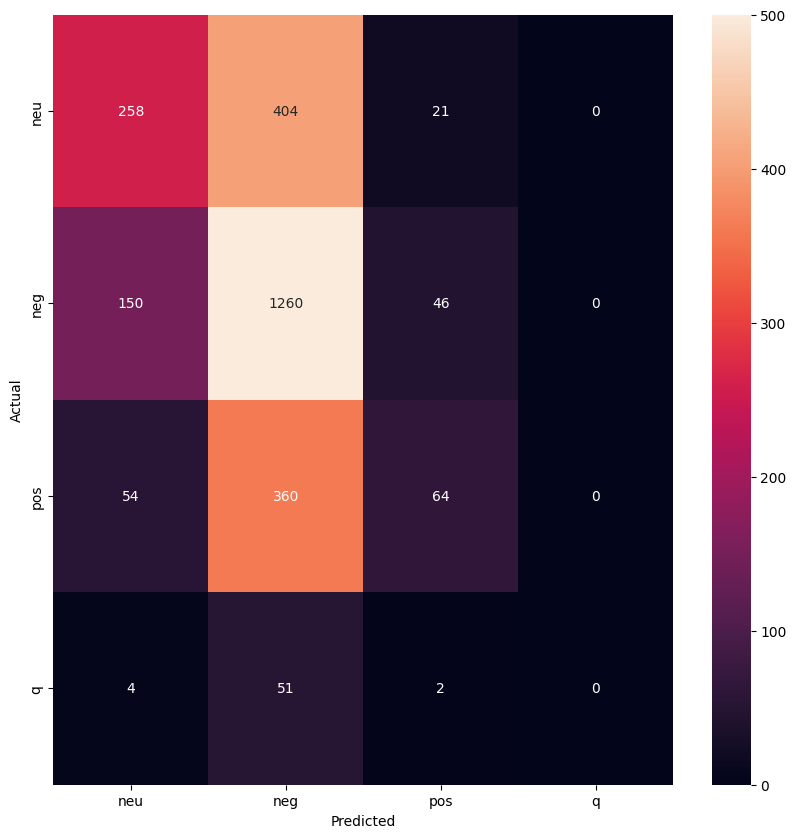

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LogisticRegression(random_state = 0)

model.fit(tfidf.fit_transform(df_train.text), df_train.label)

X_test = tfidf.transform(df_test['text'])

y_pred = model.predict(X_test)
y_test = df_test.label
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
label_name = list(df_train.label.unique())

sns.heatmap(conf_mat, annot=True, fmt='d',vmin=0, vmax=500,xticklabels = label_name, yticklabels =label_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(df_test.label, y_pred))


              precision    recall  f1-score   support

         neg       0.55      0.38      0.45       683
         neu       0.61      0.87      0.71      1456
         pos       0.48      0.13      0.21       478
           q       0.00      0.00      0.00        57

    accuracy                           0.59      2674
   macro avg       0.41      0.34      0.34      2674
weighted avg       0.56      0.59      0.54      2674



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
